### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [1]:
#student_name = "MD Nadim Yeasin"
#student_id = "48343110"

In [2]:
# your code and solutions
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('The E-commerce Dataset.csv')
print(dataset)
print('Gender value null is ' + str(dataset['gender'].isnull().sum()))
print('Rating value null is ' + str(dataset['rating'].isnull().sum()))

print('Helpfulness value null is ' + str(dataset['helpfulness'].isnull().sum()))
review= (dataset['review'] == 'none').sum()
print('Review value null is ' + str(review))

print('Length of the dataset is '+str(len(dataset)))
#dataset.shape




       userId  timestamp                                    review  \
0        4051      12807                 Great job for what it is!   
1        4052     122899               Free Access Worth your Time   
2          33      12700             AOL..I love you!!!!!!!!!!!!     
3          33      21000              EBAY!!!  I LOVE YOU!!!! :-)*   
4          33      22300           Blair Witch...Oh Come On.......   
...       ...        ...                                       ...   
19995   10805      50600                 The Upper Class Fast Food   
19996   10806      82201             What more can you ask for????   
19997   10806      82201          Excellent steak for a good price   
19998   10807      31504                     Different story world   
19999   10808      10200  Boldly Displaying Sigourneys Cleavage ..   

                                                    item  rating  helpfulness  \
0                                                   eBay     5.0          2.0 

In [3]:
newDataset = dataset.drop(dataset.index[(dataset['gender'].isnull()) |
                                        (dataset['rating'].isnull()) |
                                        (dataset['helpfulness'].isnull()) |
                                        (dataset['review'] == 'none')])
print('Gender value null is ' + str(newDataset['gender'].isnull().sum()))
print('Rating value null is ' + str(newDataset['rating'].isnull().sum()))

print('Helpfulness value null is ' + str(newDataset['helpfulness'].isnull().sum()))
print('Review value null is ' + str(newDataset['review'].isnull().sum()))

print('Length of the newDataset is '+str(len(newDataset)))


Gender value null is 0
Rating value null is 0
Helpfulness value null is 0
Review value null is 0
Length of the newDataset is 19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [4]:
# Q2.1 total number of unique users, unique reviews, unique items, and unique categories
print('Total number of unique users is ' + str(len(newDataset.userId.unique())))

print('Total number of unique review is ' + str(len(newDataset.review.unique())))

print('Total number of unique items is ' + str(len(newDataset.item.unique())))

print('Total number of unique categories is ' + str(len(newDataset.category.unique())))

Total number of unique users is 8562
Total number of unique review is 19459
Total number of unique items is 89
Total number of unique categories is 9


In [5]:
#Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records

print('Total number is ' + str(newDataset.rating.sum()))
print('Mean is ' + str(newDataset.rating.mean()))
print('STD is ' + str(newDataset.rating.std()))
print('Min number is ' + str(newDataset.rating.min()))
print('Max number is ' + str(newDataset.rating.max()))

Total number is 73725.0
Mean is 3.7017975497087767
STD is 1.4044507218710944
Min number is 1.0
Max number is 5.0


In [6]:
#Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders

male = newDataset[newDataset.gender == 'M']
#print(len(male))

female = newDataset[newDataset.gender == 'F']
#print(len(female))

#For males
print('For males Mean is ' + str(male.rating.mean()))
print('For males STD is ' + str(male.rating.std()))

print('For males Min number is ' + str(male.rating.min()))
print('For males Max number is ' + str(male.rating.max()))

#For females
print('For females Mean is ' + str(female.rating.mean()))
print('For females STD is ' + str(female.rating.std()))

print('For females Min number is ' + str(female.rating.min()))
print('For females Max number is ' + str(female.rating.max()))

For males Mean is 3.6866541539069444
For males STD is 1.413097727103784
For males Min number is 1.0
For males Max number is 5.0
For females Mean is 3.71745124068212
For females STD is 1.3953554048259325
For females Min number is 1.0
For females Max number is 5.0


In [7]:

#Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
#group by on items
# describe function on  new datafram
print('Mean of the number of ratings that received by each items: '+ str(newDataset.groupby('item')['rating'].mean()))


print('STD of the number of ratings that received by each items: '+ str(newDataset.groupby('item')['rating'].std()))

print('Max of the number of ratings that received by each items: '+ str(newDataset.groupby('item')['rating'].max()))
print('Min of the number of ratings that received by each items: '+ str(newDataset.groupby('item')['rating'].min()))









Mean of the number of ratings that received by each items: item
AOL (America Online)     2.500532
All Advantage            3.412481
Alta Vista (by 1stUp)    3.541401
Amazon.com               3.683333
American Airlines        3.054054
                           ...   
Wendy's                  3.971429
What Lies Beneath        3.450000
X-Men                    4.118367
X.com                    4.023121
eBay                     4.333893
Name: rating, Length: 89, dtype: float64
STD of the number of ratings that received by each items: item
AOL (America Online)     1.368528
All Advantage            1.541706
Alta Vista (by 1stUp)    1.263341
Amazon.com               1.571095
American Airlines        1.417015
                           ...   
Wendy's                  1.093322
What Lies Beneath        1.201676
X-Men                    0.853074
X.com                    1.474409
eBay                     0.949618
Name: rating, Length: 89, dtype: float64
Max of the number of ratings that received 

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

### In the first box plot the two diagram between male and female is identical.Then median, 	quartile	,range and spread is the same.

### In the category and rating plot, only in media sections most of the rating is lower.On the other hand, games and books has multiple outliers. Therefore, all the other categories share a similar rating.

### Lastly, in the helpfullness vs rating plot any noticable co relation can not be seen.






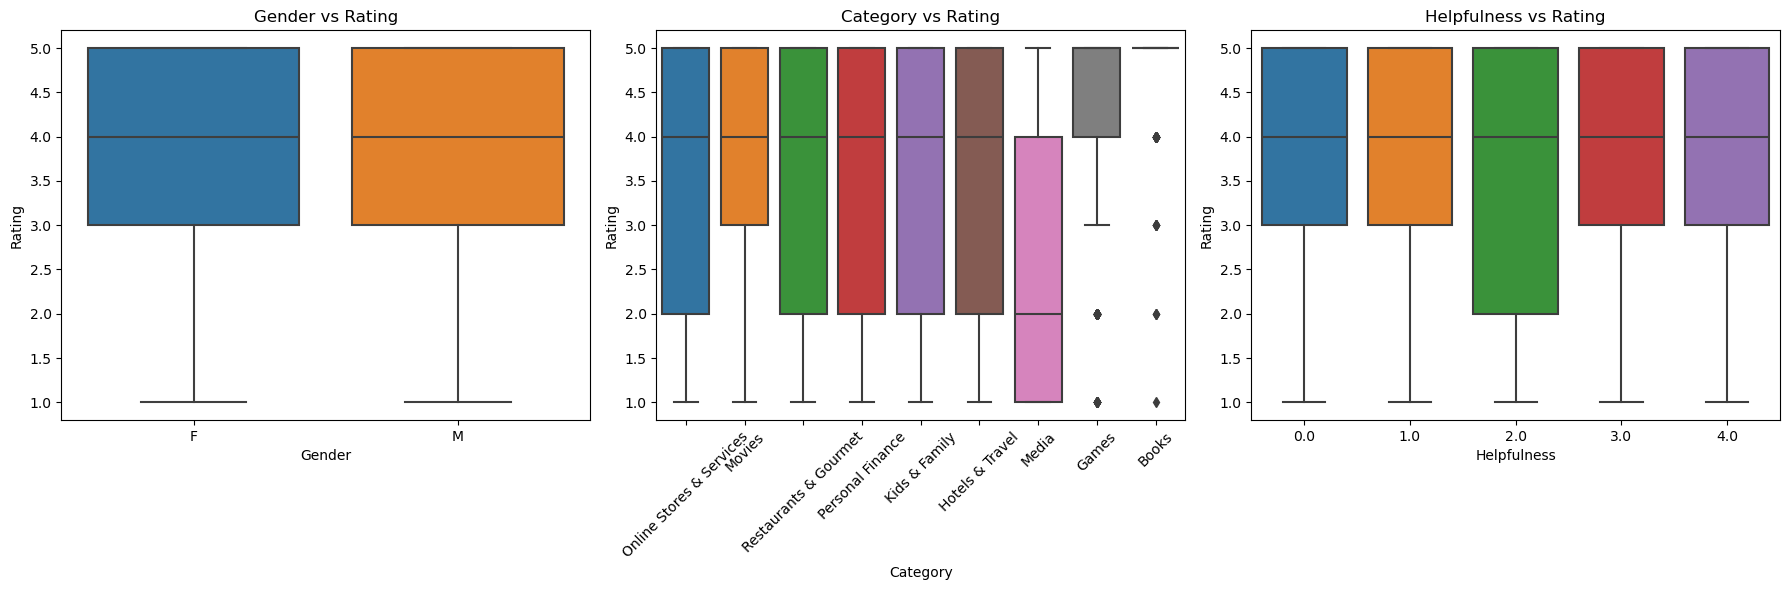

In [8]:

import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Gender vs Rating
sns.boxplot(data=newDataset, x='gender', y='rating', ax=axes[0])
axes[0].set_title('Gender vs Rating')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Rating')

# Plot 2: Category vs Rating
sns.boxplot(data=newDataset, x='category', y='rating', ax=axes[1])
axes[1].set_title('Category vs Rating')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Rating')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Helpfulness vs Rating
sns.boxplot(data=newDataset, x='helpfulness', y='rating', ax=axes[2])
axes[2].set_title('Helpfulness vs Rating')
axes[2].set_xlabel('Helpfulness')
axes[2].set_ylabel('Rating')

plt.tight_layout()
plt.show()

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [9]:
# your code and solutions
# 1.reviews of which the helpfulness is no more than 2
newDataset_clean_1 = newDataset.drop( newDataset.index[(newDataset.helpfulness <= 2)])
print(len(newDataset_clean_1))
#len(newDataset)

# 2.users who rate less than 7 items

newDataset_clean_2 = newDataset_clean_1.drop(newDataset_clean_1.index[newDataset_clean_1['userId'].groupby(newDataset_clean_1['userId']).transform('count') < 7])

print(len(newDataset_clean_2))

# 3.items that receives less than 11 ratings
ratings_count = newDataset_clean_2.groupby('item').size()

items_less_than_11_ratings = ratings_count[ratings_count < 11]

newDataset_clean_3 = newDataset_clean_2[~newDataset_clean_2['item'].isin(items_less_than_11_ratings.index)]

print("After dropping outliers length is :" + str(len(newDataset_clean_3)))
                        

13643
2741
After dropping outliers length is :2685
